In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import AcFCM

In [12]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

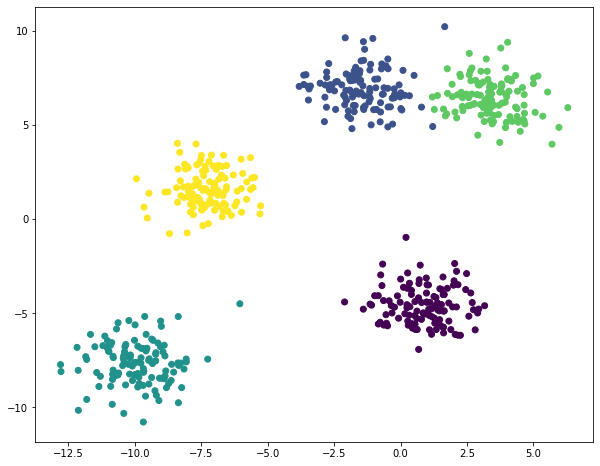

In [13]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=1, random_state=100)
plot_datapoints(X, y)

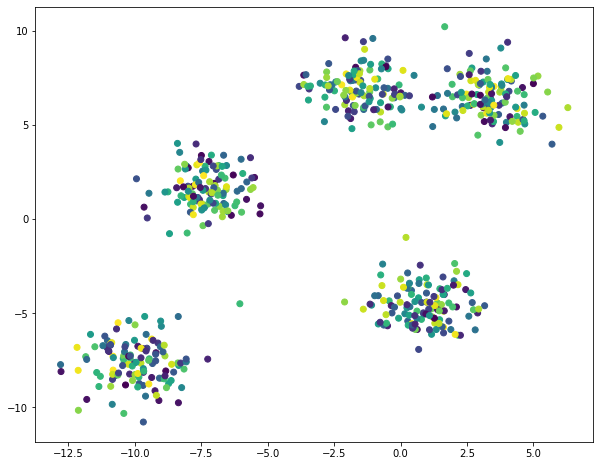

0) J_fcm: 579.4114343818909, V_XB: 16637.554040302744
1) J_fcm: 366.06684487467027, V_XB: 47731.82095148442
2) J_fcm: 363.2941235361317, V_XB: 14340.05700342584
3) J_fcm: 347.97761990998373, V_XB: 3367.2137194627558
4) J_fcm: 285.7541775878436, V_XB: 788.7705692563379
5) J_fcm: 191.92703287202525, V_XB: 481.03431058069253
6) J_fcm: 114.06572768761768, V_XB: 59.31362977005012
7) J_fcm: 76.19494133748623, V_XB: 59.4976278483228
8) J_fcm: 57.72231777350859, V_XB: 14.531282318410241
9) J_fcm: 47.13945420834742, V_XB: 37.63097809067244
10) J_fcm: 41.160570533547265, V_XB: 10.005257170399004
11) J_fcm: 37.95310834995488, V_XB: 3.5437719552993294
12) J_fcm: 36.21839844138368, V_XB: 27.81225189143455
13) J_fcm: 34.821766965861286, V_XB: 2.780896268626596
14) J_fcm: 33.910093805041804, V_XB: 0.8595990966154788
15) J_fcm: 33.15430416745829, V_XB: 0.9007030268961661
16) J_fcm: 32.50320010601111, V_XB: 0.9340626980468263
17) J_fcm: 31.874994294841443, V_XB: 0.9533109131360362
18) J_fcm: 31.2698346

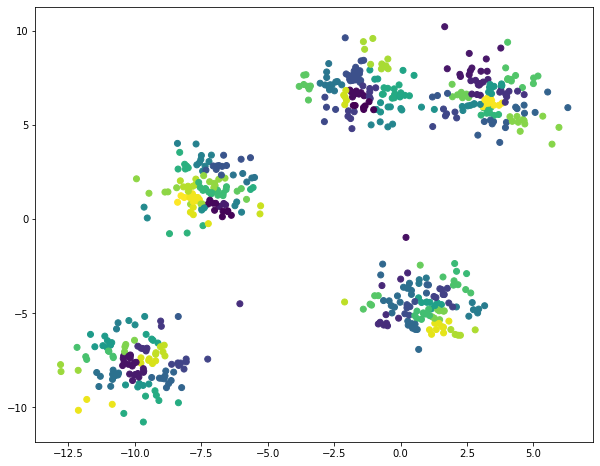

In [14]:
ac_fcm = AcFCM(X, 100)
plot_datapoints(X, np.argmax(ac_fcm.run(0)[0], axis=1))
plot_datapoints(X, np.argmax(ac_fcm.run()[0], axis=1))

Current V_XB = 0.5469809049546261, old V_XB = 0.7027340704024907, clusters = 99
Current V_XB = 0.33220440527888667, old V_XB = 0.5469809049546261, clusters = 98


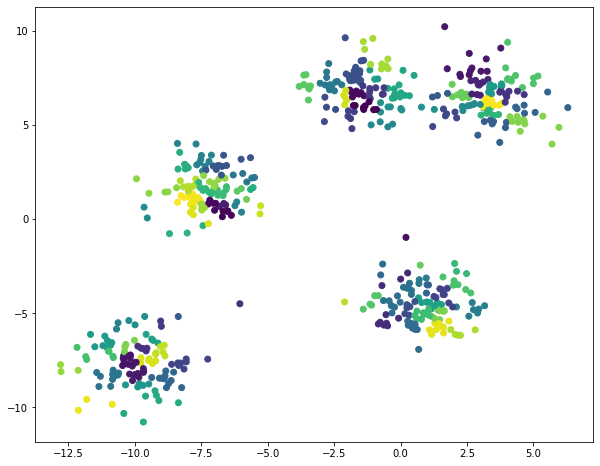

In [15]:
old_V_XB = ac_fcm.get_v_xb()

while ac_fcm.c > 2:
    old_U, old_V = ac_fcm.U, ac_fcm.V
    ac_fcm.U, ac_fcm.V = ac_fcm.absorbtive_criteria()
    ac_fcm.run(logs_enabled=False)

    V_XB = ac_fcm.get_v_xb(c=ac_fcm.c-1)
    if V_XB > old_V_XB:
        ac_fcm.U, ac_fcm.V = old_U, old_V
        break

    ac_fcm.c -= 1
    print(f'Current V_XB = {V_XB}, old V_XB = {old_V_XB}, clusters = {ac_fcm.c}')
    old_V_XB = V_XB

plot_datapoints(X, np.argmax(ac_fcm.run(0)[0], axis=1))